
# Project Name: Analysis Football Transfers Fees from 2000 to 2018

# Name of the team : The Eagles

# Students name, roles and E-mail:
### 1-Abdullah Khalid Alsudayri / Leader / 437100514@student.edu.ksu.sa
### 2-Yazeed Mohammed Alsuhaibani / Data analyst / 437101778@student.edu.ksu.sa
### 3-Ibrahim Ahmed Aldosaimani / Data analyst / 436105417@student.edu.ksu.sa
### 4-

# Table of contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

First of all, we need to install some packages to run our code \
1-pandas \
2-numpy \
3-matplotlib  
4-seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

### Data Cleaning

In [2]:
df = pd.read_csv('top250-00-19.csv')

We get this data from kaggle website --> https://www.kaggle.com/vardan95ghazaryan/top-250-football-transfers-from-2000-to-2018

In [3]:
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


### The our dataset contains:
1-Name: the name of a football plyer. \
2-position: playing position example (Right Winger - Centre-Forward - Centre-Back ). \
3-Age: Age by the time of a transfer. \
4-Team_from: Team that sold a player to another. \
5-Team_to: Team, where player was sold. \
6-League_to : the League, where player was sold to. \
7-League_from : the league which of selling team. \
8-Season: Football season, when the transfer took place. \
9-Market_value : Estimated market value of each player in the team . \
10-Transfer_fee: Actual value of transfer.


In [5]:
df.describe()

,Age,Market_value,Transfer_fee
count,4700.000000,3.440000e+03,4.700000e+03
mean,24.338723,8.622469e+06,9.447586e+06
std,3.230809,8.795181e+06,1.043772e+07
min,0.000000,5.000000e+04,8.250000e+05
25%,22.000000,3.500000e+06,4.000000e+06
50%,24.000000,6.000000e+06,6.500000e+06
75%,27.000000,1.000000e+07,1.082000e+07
max,35.000000,1.200000e+08,2.220000e+08


Here we can see in the minimum age it is zero and that not make sence, so we have to drop this row

In [6]:
df.query('Age == 0')

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
236,Marzouq Al-Otaibi,Centre-Forward,0,Shabab,Saudi Arabia,Ittihad,Saudi Arabia,2000-2001,NaN,2000000


In [7]:
df.drop([236], inplace=True)

So here we delete the row (236) 

In [8]:
df.describe()

,Age,Market_value,Transfer_fee
count,4699.000000,3.440000e+03,4.699000e+03
mean,24.343903,8.622469e+06,9.449171e+06
std,3.211578,8.795181e+06,1.043826e+07
min,15.000000,5.000000e+04,8.250000e+05
25%,22.000000,3.500000e+06,4.000000e+06
50%,24.000000,6.000000e+06,6.500000e+06
75%,27.000000,1.000000e+07,1.082000e+07
max,35.000000,1.200000e+08,2.220000e+08


And here we can check if our value delete it and it's

In [9]:
df.head(1)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000


Now droping the columes that we don't need it.

In [10]:
df.drop(axis=1, labels=['Market_value'], inplace=True)

Now we will to check

In [11]:
df.head(1)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,60000000


Done

Finally we will to check if we have and duplicate value

In [12]:
df.duplicated().sum()

0

That's good we don't have any duplicate value

<a id='eda'></a>
## Exploratory Data Analysis



### First visualization \ We will analyze profit for each team

Here we will collect the players' selling prices for each team

In [13]:
team_from_sum = df.groupby(['Team_from'])['Transfer_fee'].sum()

And here we will collect the players' buying prices for each team

In [14]:
team_to_sum = df.groupby(['Team_to'])['Transfer_fee'].sum()

Here we will calculate the profits and sorting the values

In [15]:
diff_team = team_from_sum - team_to_sum
diff_team = diff_team.sort_values(ascending=False)
#We divide diff_team here to be the prices in the millions
diff_team = diff_team/1000000
diff_team.head()

FC Porto          556.74
Benfica           451.05
Udinese Calcio    342.50
River Plate       324.63
Parma             263.79
Name: Transfer_fee, dtype: float64

Ok now we will visualize the data

FC Porto          556.74
Benfica           451.05
Udinese Calcio    342.50
River Plate       324.63
Parma             263.79
Monaco            262.56
AFC Ajax          245.33
Santos FC         245.00
LOSC Lille        220.44
Sporting CP       209.25
Name: Transfer_fee, dtype: float64


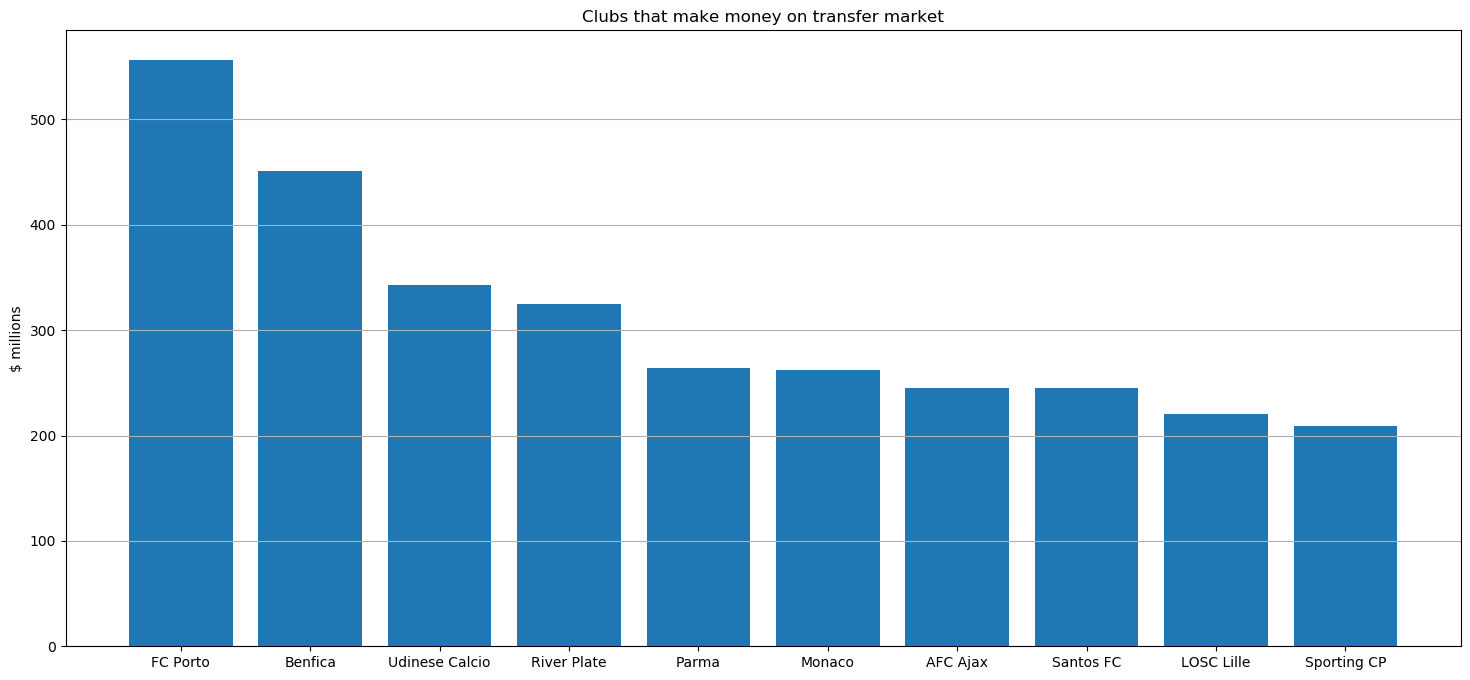

In [175]:
fig, ax = plt.subplots(figsize=(18,8))
make_money = diff_team.sort_values(ascending=False)[:10]
print(make_money)
ax.bar(make_money.index, make_money.values)
ax.set_title("Clubs that make money on transfer market")
ax.set_ylabel("$ millions")
ax.set_xticklabels(make_money.index)
plt.grid(axis='y')

### Research Question 2  (Replace this header name!)

In our dataset we have position column in this column we have a lot of position in detail like defender position we have about four position like Right-Back and Centre-Back etc .., so we want to collect them in one position to make it easier for us to analyze it

In [54]:
position_group = {'Right Winger': 'Attacker','Centre-Forward':'Attacker','Left Winger':'Attacker','Centre-Back':'Defender','Central Midfield':
               'Midfield','Attacking Midfield': 'Midfield', 'Defensive Midfield': 'Midfield','Second Striker': 'Attacker', 'Goalkeeper': 'Goalkeeper',
               'Right-Back':'Defender','Left Midfield': 'Midfield', 'Left-Back':'Defender','Right Midfield':'Midfield','Forward':'Attacker','Sweeper':'Midfield',
               'Defender':'Defender','Midfielder':'Midfield'}

So here we create new column and it's name New_position

In [56]:
df['New_position'] = pd.Series(df.Position.map(position_group), index = df.index)

In [19]:
df.head(1)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee,New_position
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,60000000,Attacker


Now we can see the new column

Attacker      1922
Midfield      1476
Defender      1121
Goalkeeper     180
Name: New_position, dtype: int64


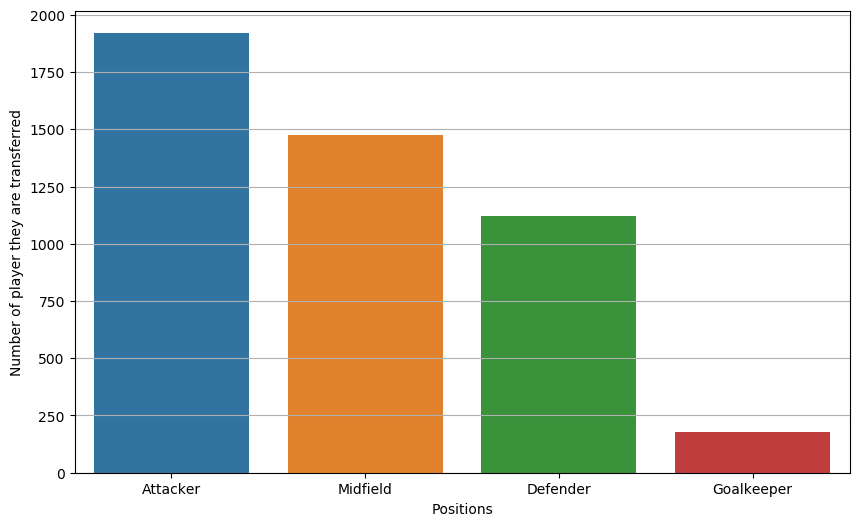

In [83]:
each_position_group = df.New_position.value_counts()
#print number of each position
print(each_position_group)
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(each_position_group.index, each_position_group.values)
ax.set_ylabel("Number of player they are transferred")
ax.set_xlabel("Positions")
plt.grid(axis='y')

### Research Question 3  (Replace this header name!)

In [179]:
df_new = df.copy()

We have copied our original data because we want to edit it's

In [180]:
df_new.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee,New_position
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,60000000,Attacker
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,56810000,Attacker
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,40000000,Attacker
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,36150000,Attacker
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,34500000,Attacker


In [181]:
new_year = {'2000-2001' : '2000' , '2001-2002' : '2001' , '2002-2003' : '2002' , '2003-2004' : '2003'  , '2004-2005' : '2004' , '2005-2006' : '2005' , '2006-2007' : '2006'  , '2007-2008' : '2007'  , '2008-2009' : '2008'  , '2009-2010' : '2009'  , '2010-2011' : '2010'  , '2011-2012' : '2011'  , '2012-2013' : '2012'  , '2013-2014' : '2013'  , '2014-2015' : '2014'  , '2015-2016' : '2015'  , '2016-2017' : '2016'  , '2017-2018' : '2017'  , '2018-2019' : '2018'   }

So here we create new column and it's name New_season

In [182]:
df_new['New_season'] = pd.Series(df_new.Season.map(new_year), index = df_new.index)

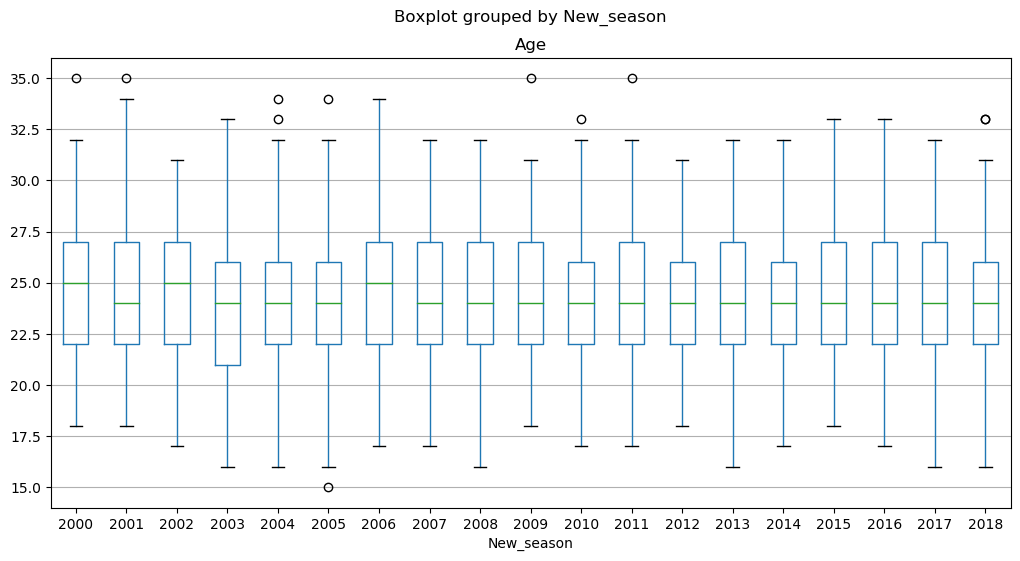

In [254]:
df_new.boxplot(column='Age',by = 'New_season',figsize=(12,6))
plt.grid(axis='x')

Here we sum transfer_fee for each age

In [279]:
tran_sum = a.groupby(['Age']).sum()[['Transfer_fee']]
tran_sum

,Transfer_fee
Age,
15,3200000
16,80700000
17,143640000
18,743810000
19,1565160000
20,2724840000
21,3428255000
22,4110520000
23,5042080000


We create simple data frame just has one column to merge it with the above column 

In [272]:

new_age = pd.DataFrame({'Age' : [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]},index=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
new_age

,Age
15,15
16,16
17,17
18,18
19,19
20,20
21,21
22,22
23,23
24,24


Now we merge it to visulize this data

In [269]:
z = pd.merge(q, new_age, left_index=True, right_index=True)
z

,Transfer_fee,Age
Age,,
15,3200000,15
16,80700000,16
17,143640000,17
18,743810000,18
19,1565160000,19
20,2724840000,20
21,3428255000,21
22,4110520000,22
23,5042080000,23


<Figure size 2000x1200 with 0 Axes>

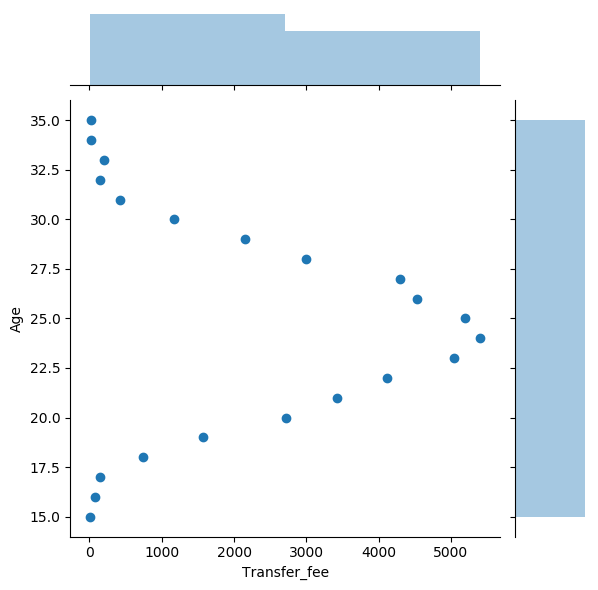

In [276]:
plt.figure(figsize=(20,12))
div = z.Transfer_fee/1000000
sns.jointplot(x= div,  y=z.Age)

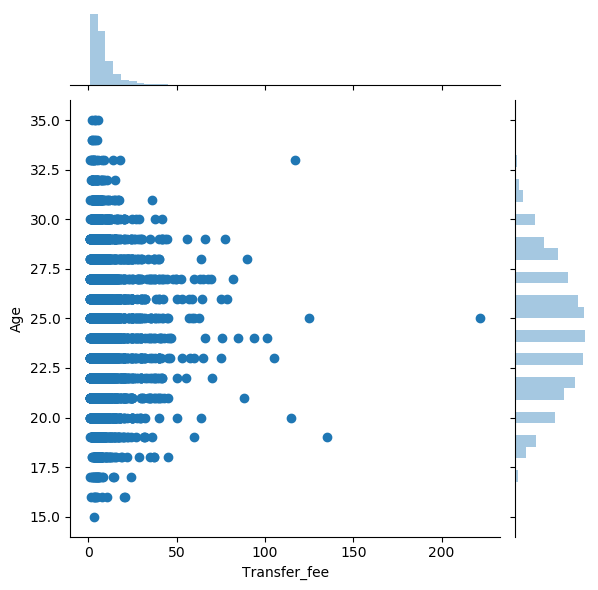

In [251]:
#We divide diff_team here to be the prices in the millions
div = df.Transfer_fee/1000000
sns.jointplot(x= div,  y=df.Age,kind='scatter')

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!